# Notebook 5 A - Multi-Layer Perceptron

## 5.A.1 Non-linear Classification Task

In this notebook, we will explore a non-linear classification problem using a synthetic dataset. This dataset consists of two classes arranged in opposite corners of a 2D space:

* Class 0 occupies the upper-left and lower-right quadrants.
* Class 1 occupies the lower-left and upper-right quadrants.

Unlike linearly separable datasets, this pattern creates a non-linear decision boundary. Traditional linear classifiers like logistic regression struggle with such data because a straight line cannot effectively separate the classes. Instead, we’ll explore how adding a hidden layer in the neural network can be used to classify this dataset accurately by learning a complex, non-linear decision boundary.

**Tasks:**

First, we start with the data generation:

* Initially, use the simple, linear separable data set. Go once through the different steps (this is the simple Neural Network model with sigmoid activation) and look at the results.
* Second, switch to the four blob data set (in the section below, you have to uncomment the line that assigns four centers). You can switch to the non-linear classification task by adding more centers for generating the data. 

Input for the data is two dimensional and there are two classes (as a target value $y$). This is visualized below.

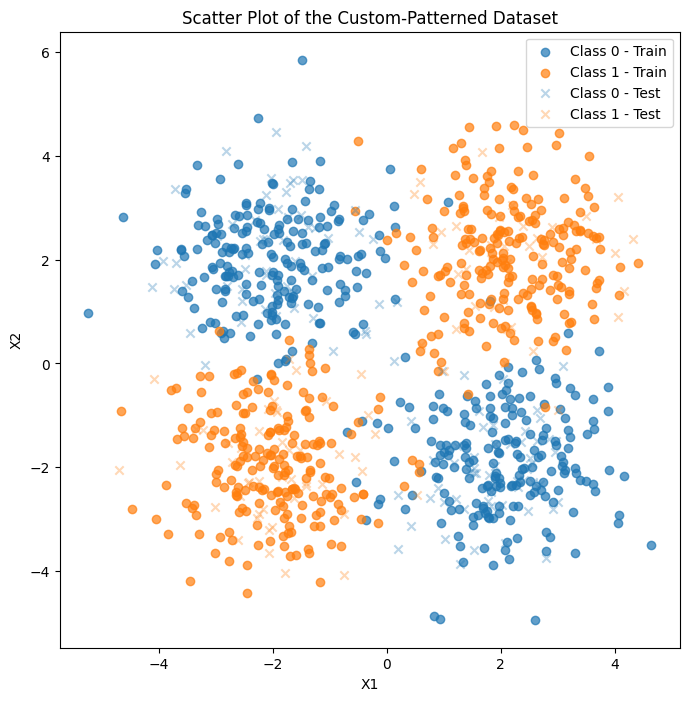

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Define custom centers for the dataset
centers = [(-2, 2), (-2, -2)]  # Two centers
# TODO: Switch towards non-linear classification task.
centers = [(-2, 2), (-2, -2), (2, 2), (2, -2)]  # Four centers
cluster_std = 1.0  # Standard deviation for each cluster

# Generate synthetic dataset
X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=cluster_std, random_state=42)

# Map clusters to two classes: 0 and 1
# Assign class 0 to clusters 0 and 1, and class 1 to clusters 2 and 3
y = (y == 1) | (y == 2)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Plot the dataset
plt.figure(figsize=(8, 8))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='C0', alpha=0.7, label='Class 0 - Train')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='C1', alpha=0.7, label='Class 1 - Train')
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='C0', alpha=0.3, marker='x', label='Class 0 - Test')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='C1', alpha=0.3, marker='x', label='Class 1 - Test')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot of the Custom-Patterned Dataset')
plt.legend()
plt.show()


### Applying our simple Neural Network Model

Below is the (known) activation function and the known Neural Network model which is then trained on the data sets.


In [2]:
import numpy as np

class SigmoidActivationFunction:
    """
    A class implementing the sigmoid activation function and its derivative.
    """

    def __call__(self, x):
        """
        Calculate the sigmoid activation function for a given input x.

        Parameters:
        x : np.array or float
            The input value(s) to the sigmoid function.

        Returns:
        np.array or float
            The sigmoid function output for each element in x.
        """
        return 1 / (1 + np.exp(-x))

    def derivative(self, x):
        """
        Calculate the derivative of the sigmoid function for a given input x.

        Parameters:
        x : np.array or float
            The input value(s) to the sigmoid function.

        Returns:
        np.array or float
            The derivative of the sigmoid function for each element in x.
        """
        sigmoid_x = self.__call__(x)
        return sigmoid_x * (1 - sigmoid_x)


In [3]:
from sklearn.metrics import mean_squared_error

class NeuralNetworkClass:
    """
    A neural network model with a configurable number of layers, using gradient descent for optimization.
    """
    
    def __init__(self, input_dim, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        # Initialize weights as a list to allow multiple layers in the future
        self.weights = [np.random.rand(1, input_dim + 1) * 0.0001]  # Start with one layer's weights
        self.mse_history = []  # List to store MSE at each iteration
        self.activation_function = SigmoidActivationFunction()  # Use the SigmoidActivationFunction class

    def add_bias_column(self, X):
        """
        Add a bias column (of ones) to the input data.
        
        Parameters:
        X : np.array, shape (n_samples, input_dim)
            The input feature values.
            
        Returns:
        X_with_bias : np.array, shape (n_samples, input_dim + 1)
            The input with an added bias column.
        """
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        return X_with_bias

    def forward(self, X):
        """
        Perform the forward pass through the 0-th layer.
        
        Parameters:
        X : np.array, shape (n_samples, input_dim + 1)
            The input data with bias.
        
        Returns:
        layer_output : np.array
            Output of the final layer after applying the activation function.
        """
        layer_input = np.dot(X, self.weights[0].T)
        layer_output = self.activation_function(layer_input)
        return layer_output

    def predict(self, X):
        """
        Make predictions using the trained model with only the 0-th layer.
        """
        X_with_bias = self.add_bias_column(X)  # Add bias column
        return self.forward(X_with_bias)  # Forward pass through only the 0-th layer

    def fit(self, X, y):
        """
        Fit the model using gradient descent, adjusting weights iteratively.
        
        Parameters:
        X : np.array, shape (n_samples, input_dim)
            The input feature values.
        y : np.array, shape (n_samples,)
            The true target values.
        """
        y = y.reshape(-1, 1)  # Ensure y is a column vector (n_samples, 1)
        X_with_bias = self.add_bias_column(X)  # Add bias column to the input data
        
        for _ in range(self.n_iterations):
            # Forward pass through the 0-th layer
            layer_output = self.forward(X_with_bias)

            # Calculate Mean Squared Error and store it
            mse = mean_squared_error(y, layer_output)
            self.mse_history.append(mse)
            
            # Backward pass for the 0-th layer
            layer_input = np.dot(X_with_bias, self.weights[0].T)  # Linear combination
            delta = (layer_output - y) * self.activation_function.derivative(layer_input)
            gradient = np.dot(delta.T, X_with_bias) / X.shape[0]
            
            # Update weights by moving in the direction of the negative gradient
            self.weights[0] -= self.learning_rate * gradient

    def get_mse_history(self):
        """
        Get the history of MSE values during training.
        
        Returns:
        mse_history : list of float
            List containing the MSE at each iteration during training.
        """
        return self.mse_history


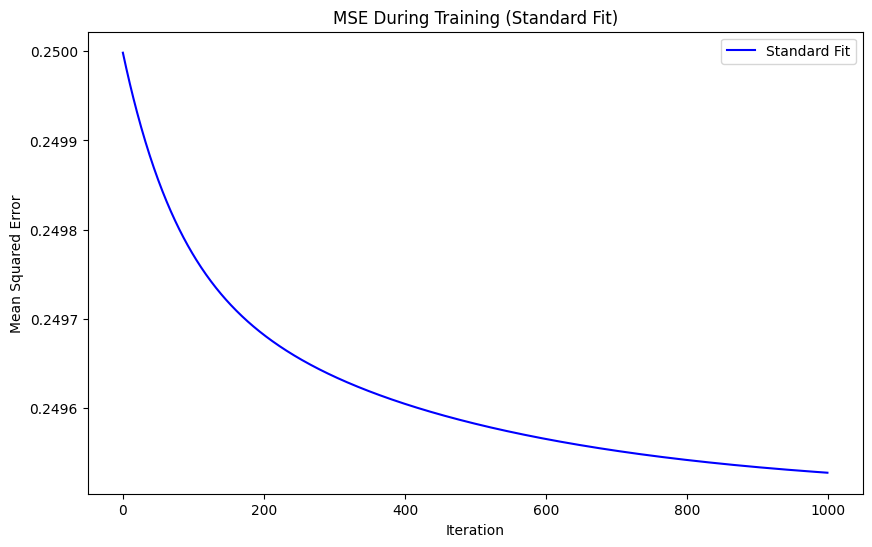

Accuracy on test set : 27.50%
Accuracy on train set: 32.88%


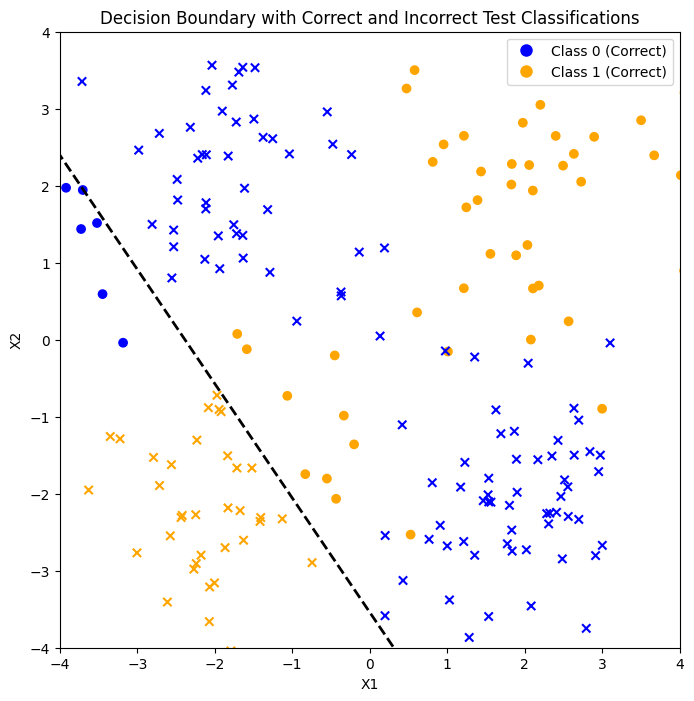

110
290


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize and train the NeuralNetworkClass model
input_dim = X_train.shape[1]
model = NeuralNetworkClass(input_dim=input_dim, learning_rate=0.02, n_iterations=1000)
model.fit(X_train, y_train)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(model.get_mse_history(), label="Standard Fit", color="blue")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("MSE During Training (Standard Fit)")
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)  # Apply threshold to convert probabilities to binary labels

y_pred_train = model.predict(X_train)
y_pred_train_labels = (y_pred_train > 0.5).astype(int)  # Apply threshold to convert probabilities to binary labels

# Calculate accuracy for information
accuracy = accuracy_score(y_test, y_pred_labels)
accuracy_train = accuracy_score(y_train, y_pred_train_labels)
print(f"Accuracy on test set : {accuracy * 100:.2f}%")
print(f"Accuracy on train set: {accuracy_train * 100:.2f}%")

# Separate correctly and incorrectly classified points, keeping class colors
correct_x, correct_y, correct_colors = [], [], []
incorrect_x, incorrect_y, incorrect_colors = [], [], []

for i in range(len(y_test)):
    if y_pred_labels[i] == y_test[i]:  # Correct classification
        correct_x.append(X_test[i, 0])
        correct_y.append(X_test[i, 1])
        correct_colors.append('blue' if y_test[i] == 0 else 'orange')
    else:  # Incorrect classification
        incorrect_x.append(X_test[i, 0])
        incorrect_y.append(X_test[i, 1])
        incorrect_colors.append('blue' if y_test[i] == 0 else 'orange')

# Plot decision boundary and test data points
plt.figure(figsize=(8, 8))

# Plot correctly classified points (circles) and incorrectly classified points (crosses) with class color
plt.scatter(correct_x, correct_y, c=correct_colors, marker='o', label='Correctly Classified')
plt.scatter(incorrect_x, incorrect_y, c=incorrect_colors, marker='x', label='Incorrectly Classified')

# Adding legend for color and boundary
correct_class_label = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class 0 (Correct)')
incorrect_class_label = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Class 1 (Correct)')
plt.legend(handles=[correct_class_label, incorrect_class_label])

# Decision boundary line
w0, w1  = model.weights[0][0][0:2]  # Extract bias and weights
wb = model.weights[0][0][-1]
x_vals = np.array([X_test[:, 0].min() - 1, X_test[:, 0].max() + 1])  # Range for x-axis
y_vals = - (w0 + w1 * x_vals)/wb   # Calculate corresponding y values for decision boundary

# Plot the decision boundary
plt.plot(x_vals, y_vals, color="black", linestyle="--", linewidth=2, label="Decision Boundary")

plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Decision Boundary with Correct and Incorrect Test Classifications")
plt.show()

print(len(correct_x) + len(correct_y))
print(len(incorrect_x) + len(incorrect_y))


## 5.A.2 Feature Selection and Generating Additional Features

In the previous exercise, you worked with a dataset consisting of four blobs and attempted to classify them using a simple neural network model. You likely observed that this single-layer neural network struggled to classify the data effectively. A simple neural network with only one layer and a linear decision boundary can only separate classes that are linearly separable. This means it can only classify data effectively if the classes can be divided by straight lines (or planes in higher dimensions). However, the four blobs are arranged in a way that requires non-linear separation to classify correctly. The single-layer model simply doesn’t have the capacity to capture these complex, non-linear relationships.

### Approach: Derive Additional Features for Better Classification

To improve our model’s performance, we can try creating new features that capture non-linear relationships between the existing features. By adding these features to our data, we can transform the dataset in ways that make it easier for a simple model to separate the classes.

**Tasks:**

* Create a New Feature for Non-linear Classification -- add a new dimension to the dataset based on the relationship between the existing features $X1$ and $X2$. This new feature will be computed as a specific combination of the features. Evaluate the Impact of the new Feature -- retrain and observe the model.
* As a second task B: You are allowed to create multiple new features. But you are restricted solely on simple comparisons and logical operations involving the original features. These comparisons will help you capture relationships between $X1$ and $X2$ that might aid in classification without directly using non-linear transformations like multiplication. Experiment by adding several features that capture different combinations of conditions. Integrate these new features into your dataset as additional columns. You can use:
    * Comparisons: Greater than (>) and less than (<)
    * Logical Operators: AND (&) and OR (|)


In [5]:
# Define custom centers for the dataset
centers = [(-2, 2), (-2, -2), (2, 2), (2, -2)]  # Four centers
cluster_std = 1.0  # Standard deviation for each cluster

# Generate synthetic dataset
X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=cluster_std, random_state=42)

# Map clusters to two classes: 0 and 1
# Assign class 0 to clusters 0 and 1, and class 1 to clusters 2 and 3
y = (y == 1) | (y == 2)

# Add a third dimension with zero values
X = np.hstack((X, np.zeros((X.shape[0], 1))))
# TODO: Compute this column for your datapoints using X[:, 0] and X[:, 1]
X[:, 2] = X[:, 0] * X[:, 1]
# TODO TASK B: Comment the above lines and add n (as many as you like) features as columnes
# X = np.hstack((X, np.zeros((X.shape[0], 4))))
#X[:, 2] = (X[:, 0] > 0).astype(int) & (X[:, 1] > 0).astype(int)
#X[:, 3] = (X[:, 0] > 0).astype(int) & (X[:, 1] < 0).astype(int)
#X[:, 4] = (X[:, 0] < 0).astype(int) & (X[:, 1] > 0).astype(int)
#X[:, 5] = (X[:, 0] < 0).astype(int) & (X[:, 1] < 0).astype(int)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

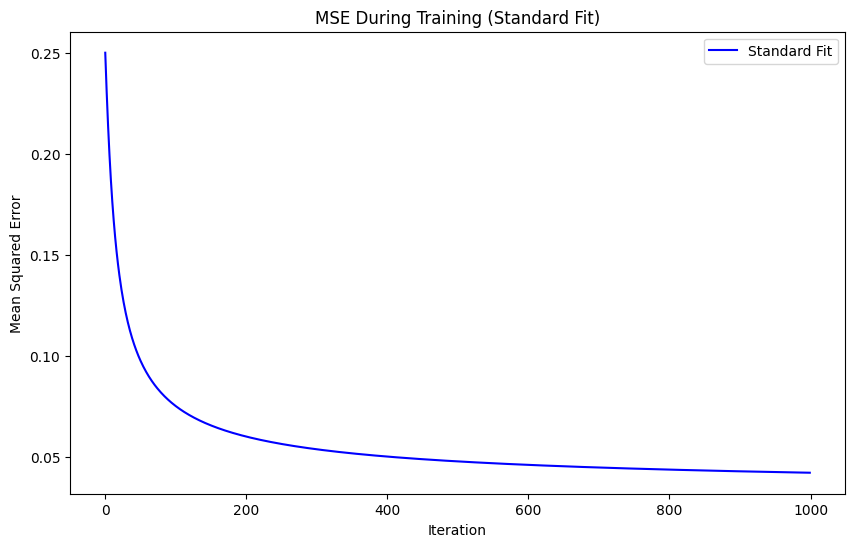

Accuracy on test set : 96.50%
Accuracy on train set: 95.62%


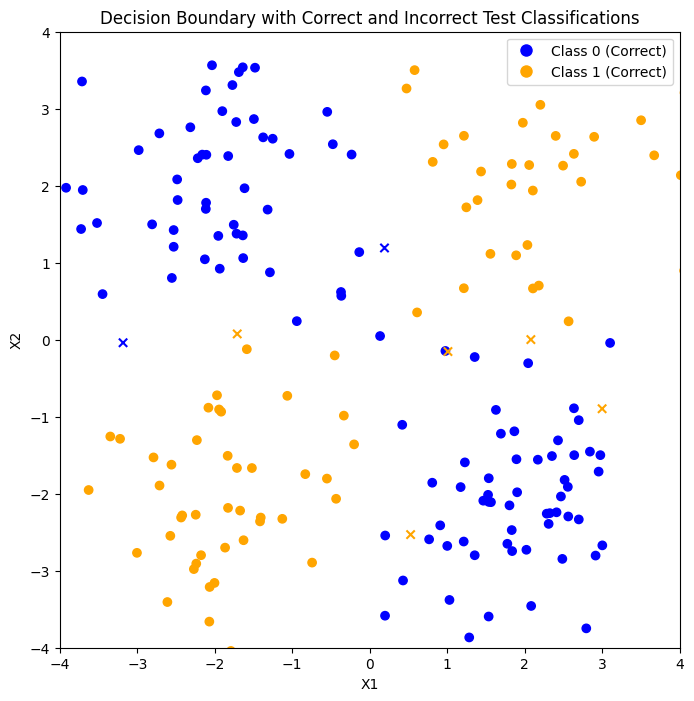

386
14


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize and train the NeuralNetworkClass model
input_dim = X_train.shape[1]
model = NeuralNetworkClass(input_dim=input_dim, learning_rate=0.02, n_iterations=1000)
model.fit(X_train, y_train)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(model.get_mse_history(), label="Standard Fit", color="blue")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("MSE During Training (Standard Fit)")
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)  # Apply threshold to convert probabilities to binary labels

y_pred_train = model.predict(X_train)
y_pred_train_labels = (y_pred_train > 0.5).astype(int)  # Apply threshold to convert probabilities to binary labels

# Calculate accuracy for information
accuracy = accuracy_score(y_test, y_pred_labels)
accuracy_train = accuracy_score(y_train, y_pred_train_labels)
print(f"Accuracy on test set : {accuracy * 100:.2f}%")
print(f"Accuracy on train set: {accuracy_train * 100:.2f}%")

# Separate correctly and incorrectly classified points, keeping class colors
correct_x, correct_y, correct_colors = [], [], []
incorrect_x, incorrect_y, incorrect_colors = [], [], []

for i in range(len(y_test)):
    if y_pred_labels[i] == y_test[i]:  # Correct classification
        correct_x.append(X_test[i, 0])
        correct_y.append(X_test[i, 1])
        correct_colors.append('blue' if y_test[i] == 0 else 'orange')
    else:  # Incorrect classification
        incorrect_x.append(X_test[i, 0])
        incorrect_y.append(X_test[i, 1])
        incorrect_colors.append('blue' if y_test[i] == 0 else 'orange')

# Plot decision boundary and test data points
plt.figure(figsize=(8, 8))

# Plot correctly classified points (circles) and incorrectly classified points (crosses) with class color
plt.scatter(correct_x, correct_y, c=correct_colors, marker='o', label='Correctly Classified')
plt.scatter(incorrect_x, incorrect_y, c=incorrect_colors, marker='x', label='Incorrectly Classified')

# Adding legend for color and boundary
correct_class_label = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class 0 (Correct)')
incorrect_class_label = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Class 1 (Correct)')
plt.legend(handles=[correct_class_label, incorrect_class_label])

plt.xlim(-4,4)
plt.ylim(-4,4)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Decision Boundary with Correct and Incorrect Test Classifications")
plt.show()

print(len(correct_x) + len(correct_y))
print(len(incorrect_x) + len(incorrect_y))


For the third dimension: We can produce an additional visualization showing the combined features. And how this allows to fit a plane in order to separate the two classes.

Accuracy on test set: 96.50%


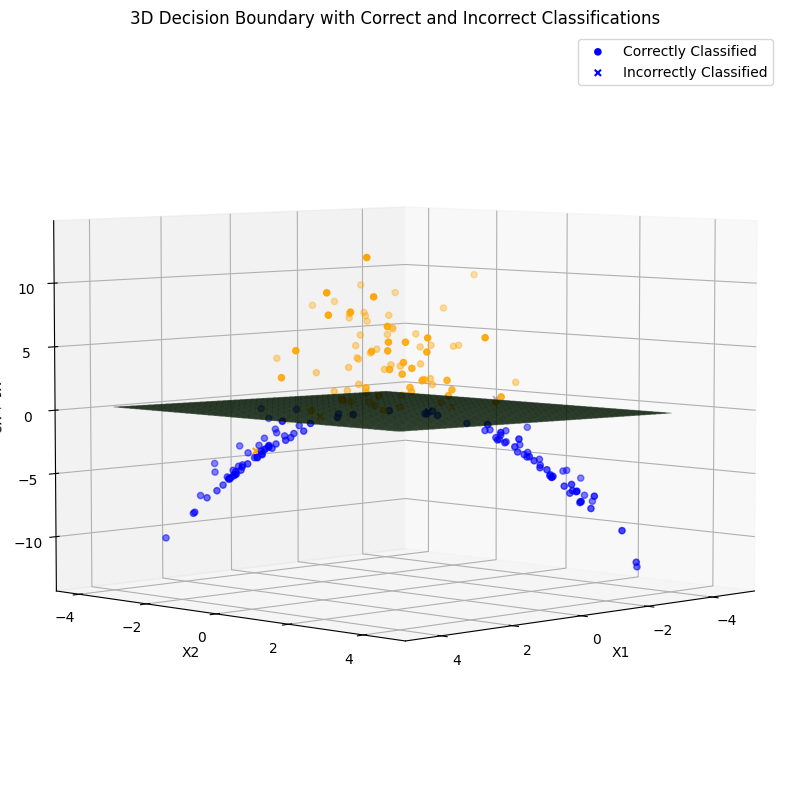

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)  # Apply threshold to convert probabilities to binary labels

# Calculate accuracy for reference
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"Accuracy on test set: {accuracy * 100:.2f}%")

# Separate the test data into correctly and incorrectly classified points
correct_x, correct_y, correct_z, correct_colors = [], [], [], []
incorrect_x, incorrect_y, incorrect_z, incorrect_colors = [], [], [], []

for i in range(len(y_test)):
    if y_pred_labels[i] == y_test[i]:  # Correct classification
        correct_x.append(X_test[i, 0])
        correct_y.append(X_test[i, 1])
        correct_z.append(X_test[i, 2])  # Third dimension based on X1 * X2
        correct_colors.append('blue' if y_test[i] == 0 else 'orange')
    else:  # Incorrect classification
        incorrect_x.append(X_test[i, 0])
        incorrect_y.append(X_test[i, 1])
        incorrect_z.append(X_test[i, 2])  # Third dimension based on X1 * X2
        incorrect_colors.append('blue' if y_test[i] == 0 else 'orange')

# Plotting in 3D
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot correctly classified points as circles and incorrectly classified as crosses
ax.scatter(correct_x, correct_y, correct_z, c=correct_colors, marker='o', label='Correctly Classified')
ax.scatter(incorrect_x, incorrect_y, incorrect_z, c=incorrect_colors, marker='x', label='Incorrectly Classified')

# Define the decision boundary plane based on model weights
w0, w1, w2, w3 = model.weights[0][0]  # Extract bias and weights
xx, yy = np.meshgrid(np.linspace(-4, 4, 50), np.linspace(-4, 4, 50))
zz = -(w0 + w1 * xx + w2 * yy) / w3  # Calculate corresponding z values

# Plot the decision boundary plane
ax.plot_surface(xx, yy, zz, color='green', alpha=0.4, edgecolor='k', linewidth=0.5)

# Adding labels and legend
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("X1 * X2")
ax.set_title("3D Decision Boundary with Correct and Incorrect Classifications")
ax.legend()

# Set a custom view angle to change perspective
ax.view_init(elev=5, azim=45)  # Adjust 'elev' and 'azim' for perspective

plt.show()


## 5.A.3 Multi-Layer Perceptron: Introducing Layers that "Learn" Features 

A Multi-Layer Perceptron (MLP) is a type of neural network that consists of an input layer, one (or more) hidden layers, and an output layer. Each layer is made up of nodes, or neurons, which are connected to the neurons in the subsequent layer. MLPs are considered "fully connected" neural networks, meaning every neuron in one layer connects to every neuron in the next layer. MLPs are commonly used for classification and regression tasks.

![](Bishop_5_1_notation.svg)

In each layer, the network processes the input data by applying a linear transformation (through weights and biases) followed by a non-linear activation function (like the sigmoid function). The model "learns" by adjusting the weights and biases through a process called backpropagation, which minimizes the error between the model's predictions and the true values. This is done by calculating the error gradients and using an optimization technique like gradient descent to update the weights.

In this exercise, you’ll implement parts of an MLP, focusing, first, on extending the forward pass to generate predictions. Secondly,  you will adapt the backward pass for learning through weight updates.

**Tasks:**

* Compute the Forward Pass: Given an input, extend the forward pass through the network. Use the provided weights and activation function to compute the output of each neuron. Pass the input data through each layer to calculate the final output of the network.
* Implement the Backward Pass: Starting from the loss, which is provided as Mean Squared Error (MSE), calculate the gradients (deltas) for each layer.
Given is already computation of the gradient of the output layer (as you have done before in the tasks). Work backwards to find the gradients of the hidden layers. Use these gradients to update the weights for each layer.

**Notes:**

* The gradient for the loss has already been computed, so you’ll start from this point.
* Use the chain rule to calculate the "delta" values that propagate backwards through each layer.
* Ensure to update the weights at each layer based on the calculated deltas.

This setup will allow you to test each layer individually to verify the accuracy of your implementation. Let’s get started with the forward pass, and then move on to the backward pass for training (and test this layer wise).

**Analyse:**

* Test the different hyperparameters in your implementation: Learning rate, number of neurons in the hidden layer, initialization of weigths. What do you observe? And what do you learn from that? Do you have ideas how to improve the methods?

In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Define custom centers for the dataset
centers = [(-2, 2), (-2, -2), (2, 2), (2, -2)]  # Four centers
cluster_std = 1.0  # Standard deviation for each cluster

# Generate synthetic dataset
X, y = make_blobs(n_samples=1000, centers=centers, cluster_std=cluster_std, random_state=42)

# Map clusters to two classes: 0 and 1
# Assign class 0 to clusters 0 and 1, and class 1 to clusters 2 and 3
y = (y == 1) | (y == 2)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.metrics import mean_squared_error

class MLPClass:
    """
    A Multi-Layer Perceptron (MLP) model with a single hidden layer and gradient descent optimization.
    """
    
    def __init__(self, input_dim, hidden_dim=4, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.mse_history = []  # List to store MSE at each iteration
        self.activation_function = SigmoidActivationFunction()  # Use the SigmoidActivationFunction class

        # Initialize weights for input-to-hidden layer and hidden-to-output layer
        self.weights = [
            np.random.rand(hidden_dim, input_dim + 1),  # Weights for input-to-hidden (4 neurons, input_dim + 1 for bias)
            np.random.rand(1, hidden_dim + 1)  # Weights for hidden-to-output (1 output neuron, hidden_dim + 1 for bias)
        ]
        #self.weights = [
        #    np.random.randn(hidden_dim, input_dim + 1) * np.sqrt(1 / input_dim),  # Xavier init for hidden layer
        #    np.random.randn(1, hidden_dim + 1) * np.sqrt(1 / hidden_dim)  # Xavier init for output layer
        #]
        # TODO TASK B: Comment the code below - this is an example which allows you to test
        # the forward pass and still train the last weight matrix without considering the 
        # first weight matrix (this is a possible solution)
        # Assign specific weights for the input-to-hidden layer (uncomment to use these values)
        self.weights[0] = np.array([
            [0.9068596,  0.62170851,  0.55163935],
            [0.90959153, -0.09067262, 0.532634],
            [0.9607063,  0.59245645,  0.17578004],
            [0.40059766, 0.36945962,  0.16458776],
            [0.61396506, 0.63269114,  0.3501316],
            [0.60410684, 1.18499862, -0.32806404],
            [0.36287036, -0.30953419, 0.81360432],
            [0.10867067, 0.82539586, -0.2150381]
        ])

    def add_bias_column(self, X):
        """
        Add a bias column (of ones) to the input data.
        """
        X_with_bias = np.c_[np.ones(X.shape[0]), X]
        return X_with_bias

    def forward(self, X):
        """
        Perform the forward pass through the network with one hidden layer.
        """
        # Forward pass through the hidden layer
        X_with_bias = self.add_bias_column(X)  # Add bias to input
        hidden_input = np.dot(X_with_bias, self.weights[0].T)  # Linear combination for hidden layer
        hidden_output = self.activation_function(hidden_input)  # Apply activation to hidden layer output

        # Forward pass through the output layer
        hidden_output_with_bias = self.add_bias_column(hidden_output)  # Add bias to hidden layer output
        output_input = np.dot(hidden_output_with_bias, self.weights[1].T)  # Linear combination for output layer
        output = self.activation_function(output_input)  # Apply activation to output layer

        return output, hidden_output_with_bias  # Return both output and hidden layer with bias for backward pass
    
    def predict(self, X):
        """
        Make predictions using the trained model by performing a forward pass through both layers.
        
        Parameters:
        X : np.array, shape (n_samples, input_dim)
            The input feature values.
        
        Returns:
        output : np.array, shape (n_samples, 1)
            The predicted output values.
        """
        output, _ = self.forward(X)  # Only return the final output, ignoring hidden layer
        return (output > 0.5).astype(int)
        #return output
    
    def binary_crossentropy(self, y_true, y_pred):
        epsilon = 1e-12  # To avoid log(0)
        y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    def fit(self, X, y):
        """
        Fit the model using gradient descent, adjusting weights iteratively.
        
        Parameters:
        X : np.array, shape (n_samples, input_dim)
            The input feature values.
        y : np.array, shape (n_samples,)
            The true target values.
        """
        y = y.reshape(-1, 1)  # Ensure y is a column vector (n_samples, 1)
        X_with_bias = self.add_bias_column(X)  # Add bias column to the input data
        
        for _ in range(self.n_iterations):
            # Forward pass
            output, hidden_output_with_bias = self.forward(X)  # Get the output and hidden layer with bias

            # Calculate Mean Squared Error and store it
            mse = mean_squared_error(y, output)
            self.mse_history.append(mse)

            # ---- Step 1: Backpropagation for Output Layer ----
            # Calculate error at the output layer
            output_error = output - y  # Error at the output layer
            # Correction -- delta is on derivative with respect to input to the output layer
            output_input = np.dot(hidden_output_with_bias, self.weights[1].T)  # Linear combination at output layer
            output_delta = output_error * self.activation_function.derivative(output_input)  # Delta for output layer

            # Calculate gradient for the output layer weights
            output_gradient = np.dot(output_delta.T, hidden_output_with_bias) / X.shape[0]
            
            # Update weights for the output layer
            self.weights[1] -= self.learning_rate * output_gradient

            # ---- Step 2: Backpropagation for Hidden Layer ----
            # Calculate the delta for the hidden layer
            # Correction -- delta is on derivative with respect to input to the output layer
            hidden_input = np.dot(X_with_bias, self.weights[0].T)  # Linear combination at hidden layer
            hidden_delta = np.dot(output_delta, self.weights[1][:, 1:]) * self.activation_function.derivative(hidden_input)

            # Calculate gradient for the hidden layer weights
            hidden_gradient = np.dot(hidden_delta.T, X_with_bias) / X.shape[0]

            # Update weights for the hidden layer
            self.weights[0] -= self.learning_rate * hidden_gradient

    def get_mse_history(self):
        """
        Get the history of MSE values during training.
        """
        return self.mse_history


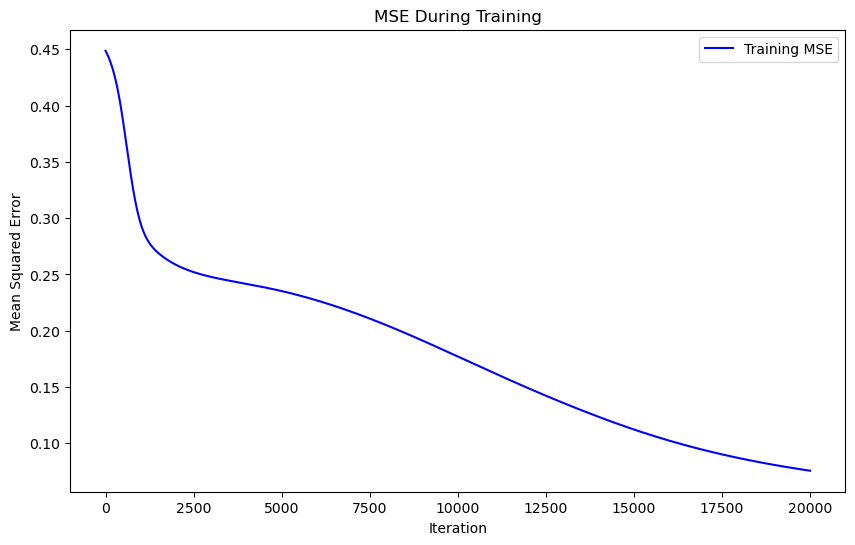

Accuracy on test set : 91.50%
Accuracy on train set: 94.38%


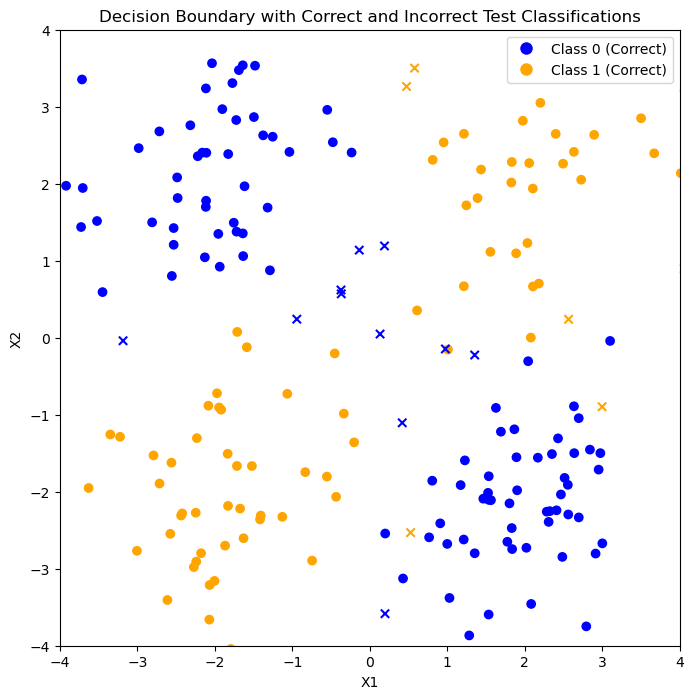

Number of correctly classified points: 183
Number of incorrectly classified points: 17


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Initialize and train the MLPClass model
input_dim = X_train.shape[1]
model = MLPClass(input_dim=input_dim, hidden_dim=8, learning_rate=0.03, n_iterations=20000)
model.fit(X_train, y_train)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(model.get_mse_history(), label="Training MSE", color="blue")
plt.xlabel("Iteration")
plt.ylabel("Mean Squared Error")
plt.title("MSE During Training")
plt.legend()
plt.show()

# Make predictions on the test and train sets
y_pred = model.predict(X_test)
y_pred_labels = y_pred  # Apply threshold to convert probabilities to binary labels

y_pred_train = model.predict(X_train)
y_pred_train_labels = (y_pred_train > 0.5).astype(int)  # Apply threshold to convert probabilities to binary labels

# Calculate accuracy for both test and train sets
accuracy = accuracy_score(y_test, y_pred_labels)
accuracy_train = accuracy_score(y_train, y_pred_train_labels)
print(f"Accuracy on test set : {accuracy * 100:.2f}%")
print(f"Accuracy on train set: {accuracy_train * 100:.2f}%")

# Separate correctly and incorrectly classified points, keeping class colors
correct_x, correct_y, correct_colors = [], [], []
incorrect_x, incorrect_y, incorrect_colors = [], [], []

for i in range(len(y_test)):
    if y_pred_labels[i] == y_test[i]:  # Correct classification
        correct_x.append(X_test[i, 0])
        correct_y.append(X_test[i, 1])
        correct_colors.append('blue' if y_test[i] == 0 else 'orange')
    else:  # Incorrect classification
        incorrect_x.append(X_test[i, 0])
        incorrect_y.append(X_test[i, 1])
        incorrect_colors.append('blue' if y_test[i] == 0 else 'orange')

# Plot decision boundary and test data points
plt.figure(figsize=(8, 8))

# Plot correctly classified points (circles) and incorrectly classified points (crosses) with class color
plt.scatter(correct_x, correct_y, c=correct_colors, marker='o', label='Correctly Classified')
plt.scatter(incorrect_x, incorrect_y, c=incorrect_colors, marker='x', label='Incorrectly Classified')

# Adding legend for color and boundary
correct_class_label = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Class 0 (Correct)')
incorrect_class_label = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Class 1 (Correct)')
plt.legend(handles=[correct_class_label, incorrect_class_label])

plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Decision Boundary with Correct and Incorrect Test Classifications")
plt.show()

print("Number of correctly classified points:", len(correct_x))
print("Number of incorrectly classified points:", len(incorrect_x))


## Gradient Computation for MLP

### Step 1: Compute Delta for Output Layer (as before)

For a single output neuron, the Mean Squared Error (MSE) loss $L$ is defined as:

$$
L = \frac{1}{2} (y_{\text{pred}} - y_{\text{true}})^2
$$

The gradient of the loss with respect to the output $ y_{\text{pred}} $ is:

$$
\frac{\partial L}{\partial y_{\text{pred}}} = y_{\text{pred}} - y_{\text{true}}
$$

The output $ y_{\text{pred}} $ is obtained by applying the activation function (e.g., sigmoid) to the linear combination of the hidden layer outputs. Let’s define:
- $ z_{\text{out}} $ as the linear combination before applying the activation function,
- $ a_{\text{out}} = \sigma(z_{\text{out}}) $ as the activated output, where $ \sigma $ is the activation function.

We are introducing a shorthand notation (see Bishop (2023)) for pushing the change of the error signal backwards through the different layers, (in Bishop, $i$ is a specific node and we focus on that activation: $\delta_{i} \coloneqq \frac{\partial L}{\partial a_j}$; below we are deriving this more generally for the weight matrix). The delta for the output layer is:

$$
\delta_{\text{out}} = (y_{\text{pred}} - y_{\text{true}}) \cdot \sigma'(z_{\text{out}})
$$

where $ \sigma'(z_{\text{out}}) $ is the derivative of the activation function at $ z_{\text{out}} $.

The gradient of the weights from the hidden layer to the output layer is then (note: in the figure, $\delta_k$ is considered as the output layer, i.e. $\delta_{\text{out}}$):

$$
\frac{\partial L}{\partial W_{\text{out}}} = \delta_{\text{out}} \cdot a_{\text{hidden}}^T
$$

where:
- $ a_{\text{hidden}} $ is the vector of activations from the hidden layer (with bias included).

![](Bishop_5_7_notation.svg)

#### Step 2: Compute Delta for Hidden Layer

To backpropagate the error to the hidden layer, we calculate the delta for each hidden neuron. For each hidden neuron $ i $, the delta $ \delta_{\text{hidden}, i} $ is given by:

$$
\delta_{\text{hidden}, i} = \left( \sum_k \delta_{\text{out}, k} \cdot W_{\text{out}, k, i} \right) \cdot \sigma'(z_{\text{hidden}, i})
$$

where:
- $ W_{\text{out}, k, i} $ are the weights connecting hidden neuron $ i $ to output neuron $ k $,
- $ z_{\text{hidden}, i} $ is the linear combination for hidden neuron $ i $ before applying the activation function (note: in the figure above, this is $z_j$),
- $ \sigma'(z_{\text{hidden}, i}) $ is the derivative of the activation function at $ z_{\text{hidden}, i} $.

The gradient of the weights from the input layer to the hidden layer is then:

$$
\frac{\partial L}{\partial W_{\text{hidden}}} = \delta_{\text{hidden}} \cdot a_{\text{input}}^T
$$

where:
- $ \delta_{\text{hidden}} $ is the vector of deltas for each hidden neuron (note: in the figure above, this is $\delta_j$),
- $ a_{\text{input}} $ is the input vector (with bias included).

### Summary

1. **Output Layer Delta and Weight Gradient**:
   $$
   \delta_{\text{out}} = (y_{\text{pred}} - y_{\text{true}}) \cdot \sigma'(z_{\text{out}})
   $$
   $$
   \frac{\partial L}{\partial W_{\text{out}}} = \delta_{\text{out}} \cdot a_{\text{hidden}}^T
   $$

2. **Hidden Layer Delta and Weight Gradient**:
   $$
   \delta_{\text{hidden}, i} = \left( \sum_k \delta_{\text{out}, k} \cdot W_{\text{out}, k, i} \right) \cdot \sigma'(z_{\text{hidden}, i})
   $$
   $$
   \frac{\partial L}{\partial W_{\text{hidden}}} = \delta_{\text{hidden}} \cdot a_{\text{input}}^T
   $$

These formulas provide the basis for backpropagation, where you start with the output layer delta and propagate the error backward to adjust the weights at each layer.


## Further Test Data

You can experiment with further test data sets, e.g., the half moon data set below.

Furthermore: [Tensorflow offers a nice playground](https://playground.tensorflow.org/) to experiment (and nicely visualize) how MLPs with different numbers of layers are able to handle different data sets. 

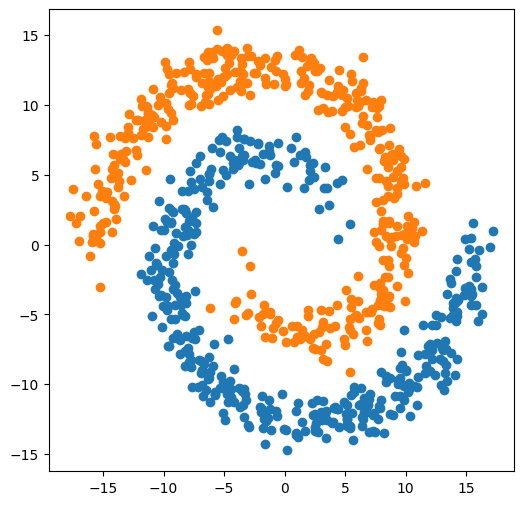

In [10]:
import numpy as np
from numpy import pi
import matplotlib.pyplot as plt

N = 400
theta = np.sqrt(np.random.rand(N))*2*pi # np.linspace(0,2*pi,100)

r_a = 2*theta + pi
data_a = np.array([np.cos(theta)*r_a, np.sin(theta)*r_a]).T
x_a = data_a + np.random.randn(N,2)

r_b = -2*theta - pi
data_b = np.array([np.cos(theta)*r_b, np.sin(theta)*r_b]).T
x_b = data_b + np.random.randn(N,2)

res_a = np.append(x_a, np.zeros((N,1)), axis=1)
res_b = np.append(x_b, np.ones((N,1)), axis=1)

res = np.append(res_a, res_b, axis=0)
np.random.shuffle(res)

#np.savetxt("result.csv", res, delimiter=",", header="x,y,label", comments="", fmt='%.5f')

fig = plt.figure(figsize=(6, 6))
plt.scatter(x_a[:,0],x_a[:,1])
plt.scatter(x_b[:,0],x_b[:,1])
plt.show()

<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 6.11.2024; Explanations were initially generated and afterwards edited;</i>
</div>